# Text2Cypher Graph Agent Demo

In [1]:
import sys
sys.path.append("../")

from dotenv import load_dotenv

load_dotenv()

from src.ps_genai_agents.agents.graph.text2cypher import create_text2cypher_graph_agent

In [2]:
agent = create_text2cypher_graph_agent()

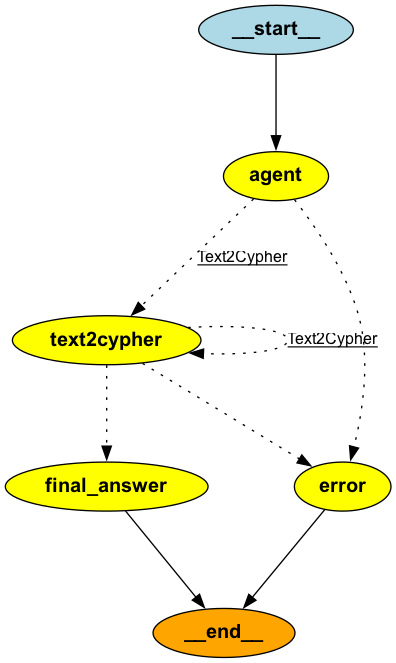

In [3]:
from IPython.display import Image

Image(agent.get_graph().draw_png())

In [4]:
res = agent.invoke(
    {
        "input": "What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?",
        "chat_history": [],
    }
)

> run_agent
initial data:  {'input': 'What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?', 'sub_questions': None, 'chat_history': [], 'agent_outcome': None, 'intermediate_steps': [], 'cypher': None, 'cypher_result': None}
tool='Text2Cypher' tool_input={'query': 'What are the total responses under seat23 for honda civic?'} log="\nInvoking: `Text2Cypher` with `{'query': 'What are the total responses under seat23 for honda civic?'}`\n\n\n" message_log=[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_N9zsYhvwU3PYF3noZdfuLi7l', 'function': {'arguments': '{"query": "What are the total responses under seat23 for honda civic?"}', 'name': 'Text2Cypher'}, 'type': 'function'}, {'id': 'call_UejW0qFg5i8U747dF8LwnefX', 'function': {'arguments': '{"query": "What is the male to female proportion for responses under seat23 for honda civic?"}', 'name': 'Text2Cypher'}, 'type': 'funct

In [5]:
res["agent_outcome"].display()


Question:
What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?

Sub Questions:
What are the total responses under seat23 for honda civic?
What is the male to female proportion for responses under seat23 for honda civic?
What is the problem for seat23 for honda civic?

            
Cypher: 
MATCH (p:Problem {id: "SEAT23"})<-[:HAS_PROBLEM]-(v:Verbatim {make: "Honda", model: "Civic"})
RETURN COUNT(v) AS totalResponses

MATCH (p:Problem {id: "SEAT23"})<-[:HAS_PROBLEM]-(v:Verbatim {make: "Honda", model: "Civic"})
WITH COUNT(v) AS totalResponses, 
     SUM(CASE WHEN v.gender = "Male" THEN 1 ELSE 0 END) AS males,
     SUM(CASE WHEN v.gender = "Female" THEN 1 ELSE 0 END) AS females
RETURN totalResponses, males, females, toFloat(males) /  (CASE WHEN females = 0 THEN 1 ELSE females END) AS maleToFemaleRatio

MATCH (p:Problem {id: "SEAT23"})<-[:HAS_PROBLEM]-(v:Verbatim {make: "Honda", model: "Civi

In [6]:
res.get("agent_outcome").sub_questions

['What are the total responses under seat23 for honda civic?',
 'What is the male to female proportion for responses under seat23 for honda civic?',
 'What is the problem for seat23 for honda civic?']